# Exercise 1: Linear Regression

## 2. Linear regression with one variable

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

You would like to use this data to help you select which city to expand
to next.

### 2.1 Plotting the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils

In [2]:
data = pd.read_csv("./input/ex1data1.txt", names=["x_1", 'y'])

In [3]:
data.head()

,x_1,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
x,y = data["x_1"], data['y']
m = y.size # number of training examples

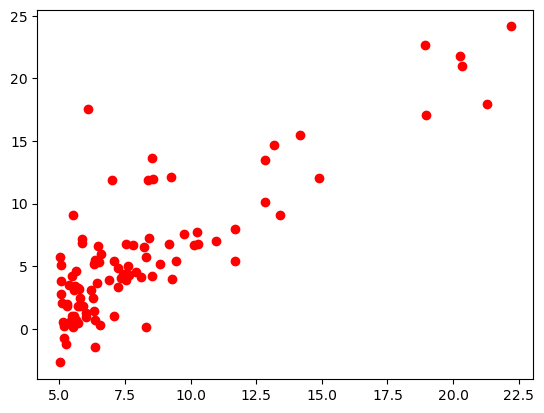

In [5]:
plt.plot(x, y, "ro")

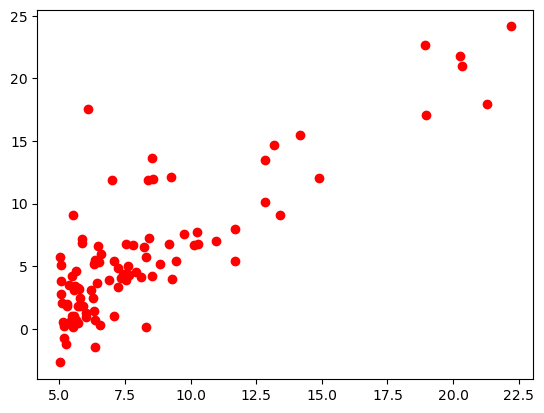

In [6]:
def plotData(x, y):
    fig = plt.figure()
    plt.plot(x, y, "ro")
    # plt.show()
plotData(x, y)

### 2.2 Gradient Descent

In [7]:
X = pd.DataFrame({"x_0":np.ones(m), "x_1":x})
X

,x_0,x_1
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598
...,...,...
92,1.0,5.8707
93,1.0,5.3054
94,1.0,8.2934
95,1.0,13.3940


#### Cost Function

In [8]:
def computeCost(X, y, theta):
    """
    cost function J = sum((h(x_i) - y_i)^2) / 2m
    """
    m = y.size
    # J = 0
    # sum(np.power((theta@X - y), 2)) / (2 * m)
    return float(sum(np.power((X@theta - y), 2) / (2 * m)))

##### cost with initial $\theta$ [0,0]

In [9]:
computeCost(X, y, np.array([0,0]))

32.072733877455676

##### cost with initial $\theta$ [-1,2]

In [10]:
computeCost(X, y, np.array([-1,2]))

54.24245508201239

In [11]:
X.iloc[:, -1]

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
       ...   
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: x_1, Length: 97, dtype: float64

#### 2.2.4 Gradient Descent

In [12]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        theta_0 = theta[0]
        theta_1 = theta[1]
        temp = theta_0 - alpha / m * sum(X@theta - y)
        # theta_1 = theta_1 - alpha / m * sum((X @ theta - y) @ X.iloc[:,-1])
        theta_1 = theta_1 - alpha / m * sum((X @ theta - y) * X.iloc[:,-1])
        J_history.append(computeCost(X, y, theta))
        theta = np.array([temp, theta_1])
    return theta, J_history

In [13]:
theta, j_hist = gradientDescent(X, y, np.zeros(2), 0.01, 1500)
theta

array([-3.63029144,  1.16636235])

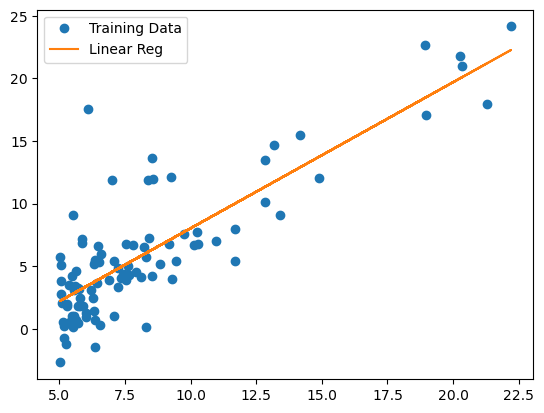

In [14]:
## plot linear fit
plt.plot(X.iloc[:,1],y, 'o')
plt.plot(X.iloc[:,1], np.dot(X, theta), '-')
plt.legend(["Training Data", "Linear Reg"])

Your final values for θ will also be used to make predictions on profits in
areas of 35,000 and 70,000 people

In [15]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print(f"For population = 35,000, we predict a profit of {predict1*10000}\n")

predict2 = np.dot([1, 7], theta)
print(f"For population = 70,000, we predict a profit of {predict2*10000}\n")

For population = 35,000, we predict a profit of 4519.7678677017675

For population = 70,000, we predict a profit of 45342.45012944714



### 2.4 Visualizing J($\theta$)

No more 3D plot for me

## Optional Exercises

## 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

### 3.1 Feature Normalization

We start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

In [16]:
data = pd.read_csv("./input/ex1data2.txt", names=["x_1", "x_2", 'y'])

In [17]:
data.head()
X = data.iloc[:, 0:2]
y = data.iloc[:, -1]
m = y.size
X.head()

,x_1,x_2
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [18]:
y.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: y, dtype: int64

In [19]:
m

47

In [20]:
def featureNormalize(X):
    # X_norm = X.copy()
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [21]:
X_norm, mu, sigma = featureNormalize(X)
X_norm.head()

,x_1,x_2
0,0.130010,-0.223675
1,-0.504190,-0.223675
2,0.502476,-0.223675
3,-0.735723,-1.537767
4,1.257476,1.090417


In [22]:
mu, sigma

(x_1    2000.680851
 x_2       3.170213
 dtype: float64,
 x_1    794.702354
 x_2      0.760982
 dtype: float64)

In [24]:
new_title = "x_0"
if new_title not in X_norm.columns: X_norm.insert(0, new_title, np.ones(m))
X_norm.head()

,x_0,x_1,x_2
0,1.0,0.130010,-0.223675
1,1.0,-0.504190,-0.223675
2,1.0,0.502476,-0.223675
3,1.0,-0.735723,-1.537767
4,1.0,1.257476,1.090417


### 3.2 Gradient Descent

In [32]:
def computeCostMulti(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    J = 1 / 2 / m * sum(np.square(X @ theta - y))
    
    # ==================================================================
    return J

In [33]:
computeCostMulti(X_norm, y, np.zeros(3))

65591548106.45744

In [95]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    
    for i in range(num_iters):
        temp = [0]*(len(theta))
        # ======================= YOUR CODE HERE ==========================
        for j in range(len(theta)):
            temp[j] = theta[j] - alpha / m * sum(X.iloc[:, j] * ((X @ theta) - y))
            #theta = np.array(temp)
        theta = np.array(temp) #above line is wrong, update when loop is over
        ## so that simutaneously update
        ## vectorized computation yields different results :(
        # theta -= alpha / m * (X.T @ ((X @ theta) - y))
        # theta -= alpha / m * np.sum(np.expand_dims(X.dot(theta) - y, axis= -1) * X, axis=0)
        # =================================================================
        # save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))
    
    return theta, J_history

In [96]:
theta, J_hist = gradientDescentMulti(X_norm, y, np.zeros(X_norm.shape[1]), 0.1, 400)

In [97]:
theta

array([340412.65957447, 110631.04895815,  -6649.47295013])

#### 3.2.1 Optional exercise: Selecting learning rates

Cost: 2043281503.795087


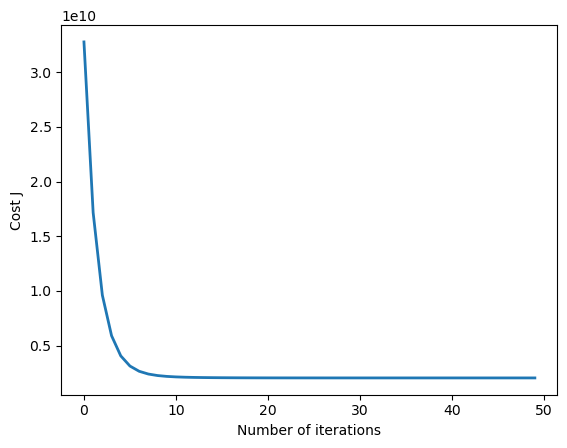

In [129]:
alpha = 0.3
num_iters = 50
theta = np.zeros(3)
theta, J_hist = gradientDescentMulti(X_norm, y, theta, alpha, num_iters)
plt.plot(np.arange(len(J_hist)), J_hist, lw=2)
plt.xlabel("Number of iterations")
plt.ylabel("Cost J")
print(f"Cost: {J_hist[-1]}")

In [133]:
## make prediction
x_norm = (np.array([1650, 3]) - mu) / sigma
x_norm = np.insert(x_norm, [0], 1)
pred = theta @ x_norm
print(f"Predicted price of a 1650 sq-ft, 3 br house is ${pred}")

Predicted price of a 1650 sq-ft, 3 br house is $293094.0981218172


### 3.3 Normal Equations

In the lecture videos, you learned that the closed-form solution to linear regression is 

$\theta = (X^TX)^-1X^Ty$

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.

In [135]:
## reload data
data = pd.read_csv("./input/ex1data2.txt", names=["x_1", "x_2", 'y'])
X = data.iloc[:, 0:2]
y = data.iloc[:, 2]
m = y.shape[0]
new_name = "x_0"
if new_name not in X.columns: X.insert(0, new_name, np.ones(m))

In [136]:
def normalEqn(X, y):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    Returns
    -------
    theta : array_like
        Estimated linear regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # =================================================================
    return theta

In [138]:
theta = normalEqn(X, y)
theta

0    89597.909543
1      139.210674
2    -8738.019112
dtype: float64

In [139]:
## make prediction
theta @ np.array([1, 1650, 3])

293081.4643348957